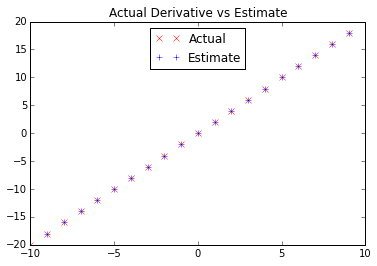

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
from functools import partial


def sum_of_squares(v):
    '''computes the sum of squared elements in v'''
    return sum(v_i**2 for v_i in v)


def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h


def square(x):
    return x * x


def derivative(x):
    return 2 * x


derivative_estimate = partial(difference_quotient, square, h=0.00001)

def derivative_estimate_simple(x, h=0.00001):
    return difference_quotient(square, x, h)


x = list(range(-10, 10))
plt.title("Actual Derivative vs Estimate")
plt.plot(x, list(map(derivative, x)), 'rx', label='Actual')
plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [14]:
# stochiastic gradient descent
from random import shuffle

def in_random_order(data):
    '''generator that returns the elements of data in random order'''
    indexes = [i for i, _ in enumerate(data)]  # create a list of indexes
    shuffle(indexes)
    for i in indexes:
        yield data[i]


def minimize_stochiastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = zip(x, y)
    theta = theta_0
    alpha = alpha_0
    min_theta = None
    min_value = float('inf')
    iterations_with_no_improvement = 0
    
    # if we ever go 100 iterations with no improvment, stop
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)
        
        if value < min_value:
            min_theta = theta
            min_value = value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            iterations_with_no_improvement += 1
            alpha *= 0.9
        
        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    
    return min_theta
